In [18]:
import numpy as np 
import qutip as qt
from tomography.operators import * # "import *" is bad Python practice, but simplest way to do some math
import pulsee.plot as pplt
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [19]:
rho_1000 = qt.Qobj(np.array([[1, 0, 0, 0],
                             [0, 0, 0, 0],
                             [0, 0, 0, 0],
                             [0, 0, 0, 0]], dtype=complex), dims=[[2,2],[2,2]])

cnot_1 = qt.Qobj(np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 0, 1],
                           [0, 0, 1, 0]], dtype=complex), dims=[[2,2],[2,2]])
H= qt.Qobj(np.array([[1, 0, 1, 0],
                     [0, 1, 0, 1],
                     [1, 0, -1, 0],
                     [0, 1, 0, -1]], dtype=complex), dims=[[2,2],[2,2]])

""" 4x4 Matrices """
IDENTITY = qt.tensor(id, id)

Ix = qt.tensor(ix, id)
Iy = qt.tensor(iy, id)
Iz = qt.tensor(iz, id)

Sx = qt.tensor(id, sx)
Sy = qt.tensor(id, sy)
Sz = qt.tensor(id, sz)

IxSx = qt.tensor(ix, sx)
IxSy = qt.tensor(ix, sy)
IxSz = qt.tensor(ix, sz)

IySx = qt.tensor(iy, sx)
IySy = qt.tensor(iy, sy)
IySz = qt.tensor(iy, sz)

IzSx = qt.tensor(iz, sx)
IzSy = qt.tensor(iz, sy)
IzSz = qt.tensor(iz, sz)




""" Operators """
# Rotation Operators


def Rx(theta):
    return (-1j * theta * ix).expm()


def Rx_I(theta):
    return qt.tensor(Rx(theta), id)


def Rx_S(theta):
    return qt.tensor(id, Rx(theta))


def Ry(theta):
    return (-1j * theta * iy).expm()


def Ry_I(theta):
    return qt.tensor(Ry(theta), id)


def Ry_S(theta):
    return qt.tensor(id, Ry(theta))


def Rz(theta):
    return (-1j * theta * iz).expm()


def Rz_I(theta):
    return qt.tensor(Rz(theta), id)


def Rz_S(theta):
    return qt.tensor(id, Rz(theta))


def U_J(t, J):
    diagonal = [np.exp(-1j * pi * J * t / 2), np.exp(1j * pi * J * t / 2), np.exp(1j * pi * J * t / 2),
                np.exp(-1j * pi * J * t / 2)]
    return qt.Qobj(np.diag(diagonal), dims=[[2, 2], [2, 2]])

In [20]:
#pplt.plot_complex_density_matrix(cnot_1 * H * rho_1000 * H.dag() * cnot_1.dag())
#display(cnot_1 * H * rho_1000 * H.dag() * cnot_1.dag())

In [21]:
theta = 22.5 * (np.pi/180)     #np uses units radians. So need to convert from deg to rad
pps = rho_1000
pps = cnot_1 * H * rho_1000 * H.dag() * cnot_1.dag()

In [22]:
#E_1
p_prime = (Ry_I(0)* Ry_S(-2*theta) * pps * Ry_S(-2*theta).dag() * Ry_I(0).dag())
E_1=(p_prime*IzSz).tr()
E_1

0.3535533905932737

In [23]:
#E_2
p_prime = (Ry_I(-4*theta)* Ry_S(-2*theta) * pps * Ry_S(-2*theta).dag() * Ry_I(-4*theta).dag())
E_2=(p_prime*IzSz).tr()
E_2

0.3535533905932738

In [24]:
#E_3
p_prime = (Ry_I(-4*theta)* Ry_S(-6*theta) * pps * Ry_S(-6*theta).dag() * Ry_I(-4*theta).dag())
E_3=(p_prime*IzSz).tr()
E_3

0.3535533905932738

In [25]:
#E_4
p_prime = (Ry_I(0)* Ry_S(-6*theta) * pps * Ry_S(-6*theta).dag() * Ry_I(0).dag())
E_4=(p_prime*IzSz).tr()
E_4

-0.3535533905932736

In [26]:
CHSH=E_1+E_2+E_3-E_4
CHSH

1.414213562373095

In [27]:
#CHSH evalualated at 22.5 degrees should give 2*np.sqrt(2)

In [28]:
3*np.cos(2*theta)-np.cos(6*theta)

2.8284271247461903

In [29]:
2*np.sqrt(2)

2.8284271247461903

In [30]:
# Define the function to plot
def theory_function(x):
    return 3*np.cos(2*x*(np.pi/180))-np.cos(6*x*(np.pi/180))

def E_total(x):
    return ((Ry_I(0)* Ry_S(-2*x*(np.pi/180)) * pps * Ry_S(-2*x*(np.pi/180)).dag() * Ry_I(0).dag())*IzSz).tr()
    +((Ry_I(-4*x*(np.pi/180))* Ry_S(-2*x*(np.pi/180)) * pps * Ry_S(-2*x*(np.pi/180)).dag() * Ry_I(-4*x*(np.pi/180)).dag())*IzSz).tr()
    +((Ry_I(-4*x*(np.pi/180))* Ry_S(-6*x*(np.pi/180)) * pps * Ry_S(-6*x*(np.pi/180)).dag() * Ry_I(-4*x*(np.pi/180)).dag())*IzSz).tr()
    -((Ry_I(0)* Ry_S(-6*x*(np.pi/180)) * pps * Ry_S(-6*x*(np.pi/180)).dag() * Ry_I(0).dag())*IzSz).tr()



In [31]:
x = np.linspace(0, 90, 90)

theory = theory_function(x)

E_total_values = [E_total(xi) for xi in x]
E_total_values=np.array(E_total_values)

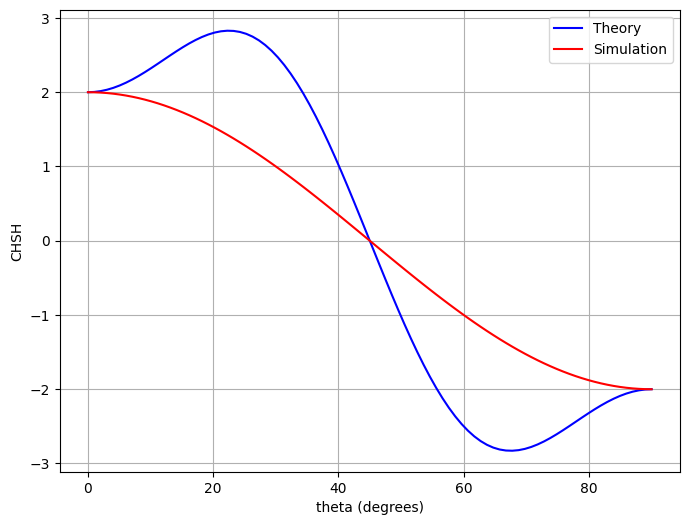

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(x, theory, label="Theory",color='blue')
plt.plot(x, 4*E_total_values, label="Simulation", color='red')
plt.xlabel('theta (degrees)')
plt.ylabel('CHSH')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
def E_1(x):
    return    ((Ry_I(0)* Ry_S(-2*x*(np.pi/180)) * pps * Ry_S(-2*x*(np.pi/180)).dag() * Ry_I(0).dag())*IzSz).tr()

E_1_values = [E_1(xi) for xi in x]
E_1_values=np.array(E_1_values)


def E_2(x):
    return ((Ry_I(-4*x*(np.pi/180))* Ry_S(-2*x*(np.pi/180)) * pps * Ry_S(-2*x*(np.pi/180)).dag() * Ry_I(-4*x*(np.pi/180)).dag())*IzSz).tr()

E_2_values = [E_2(xi) for xi in x]
E_2_values=np.array(E_2_values)



def E_3(x):
    return  +((Ry_I(-4*x*(np.pi/180))* Ry_S(-6*x*(np.pi/180)) * pps * Ry_S(-6*x*(np.pi/180)).dag() * Ry_I(-4*x*(np.pi/180)).dag())*IzSz).tr()

E_3_values = [E_3(xi) for xi in x]
E_3_values=np.array(E_3_values)



def E_4(x):
    return   -((Ry_I(0)* Ry_S(-6*x*(np.pi/180)) * pps * Ry_S(-6*x*(np.pi/180)).dag() * Ry_I(0).dag())*IzSz).tr()

E_4_values = [E_4(xi) for xi in x]
E_4_values=np.array(E_4_values)


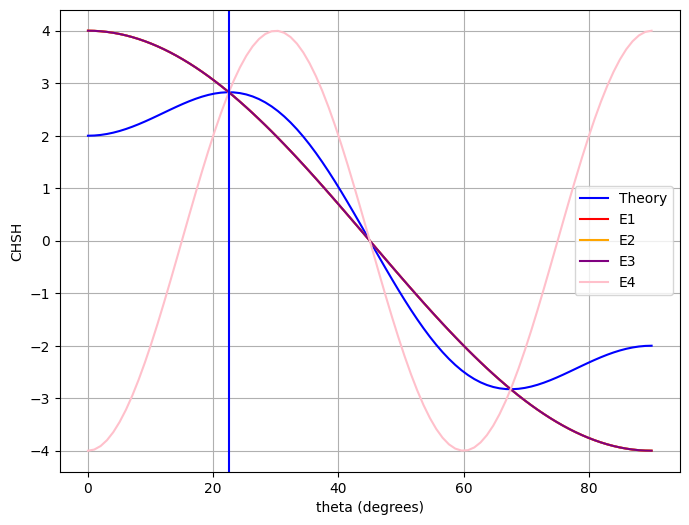

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(x, theory, label="Theory",color='blue')
plt.plot(x, 8*E_1_values, label="E1", color='red')
plt.plot(x, 8*E_2_values, label="E2", color='orange')
plt.plot(x, 8*E_3_values, label="E3", color='purple')
plt.plot(x, 8*E_4_values, label="E4", color='pink')
plt.xlabel('theta (degrees)')
plt.ylabel('CHSH')
plt.legend()
plt.grid(True)
plt.axvline(x = 22.5, color = 'b', label = 'axvline - full height')
plt.show()
